In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data = pd.read_csv("./Dataset/train.csv")
test_data = pd.read_csv("./Dataset/test.csv")

In [5]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Droping Cabin as it don't have enough data
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [12]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
train_data["Embarked"].fillna("S", inplace=True)
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [15]:
test_data["Fare"].fillna(test_data["Fare"].mean(), inplace=True)
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

There are diffrent ways to fill missing age

- Mean of that perticular gender
- Mean of that person's class
- Mean of only age
- Creating bins


In [21]:
# Here we are using Normalized method, using mean and std
# Assuming age having normalized values

# choosing and random between ( mean - std ) and (mean + std)
train_age = np.random.randint(train_data["Age"].mean(
) - train_data["Age"].std(), train_data["Age"].mean() + train_data["Age"].std(), 177)

test_age = np.random.randint(test_data["Age"].mean(
) - test_data["Age"].std(), test_data["Age"].mean() + test_data["Age"].std(), 86)

In [24]:
train_data["Age"][train_data["Age"].isnull()] = train_age
test_data["Age"][test_data['Age'].isnull()] = test_age

C:\Users\dbhuva26\AppData\Local\Temp\ipykernel_16408\2447862473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Age"][train_data["Age"].isnull()] = train_age
C:\Users\dbhuva26\AppData\Local\Temp\ipykernel_16408\2447862473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Age"][test_data['Age'].isnull()] = test_age


In [25]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


EDA (Exploratory data analysis)


In [26]:
train_data[train_data["Pclass"] == 1]["Survived"].value_counts()

Survived
1    136
0     80
Name: count, dtype: int64

In [41]:
# Mean gives percentage of survived persons

train_data.groupby(['Pclass'])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Class 1 having more chances of surviving and lesser for 3


In [42]:
train_data.groupby(['Sex'])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Female having more chances of surviving and lesser for male


In [45]:
train_data.groupby(['Embarked'])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\dbhuva26\AppData\Local\Temp\ipykernel_16408\3317179518.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["Age"])
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befor

<Axes: xlabel='Age', ylabel='Density'>

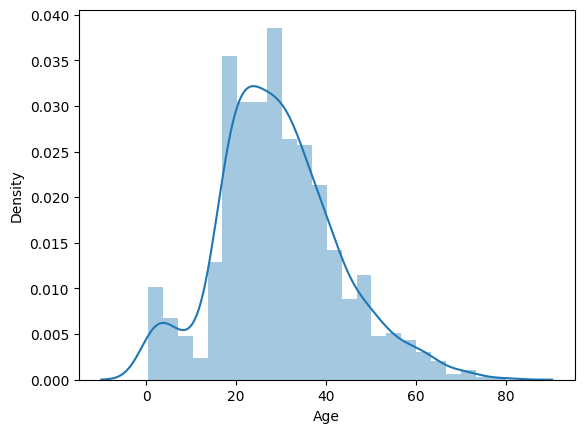

In [46]:
sns.distplot(train_data["Age"])

C:\Users\dbhuva26\AppData\Local\Temp\ipykernel_16408\3505997378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["Age"][train_data["Survived"] == 0])
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

<Axes: xlabel='Age', ylabel='Density'>

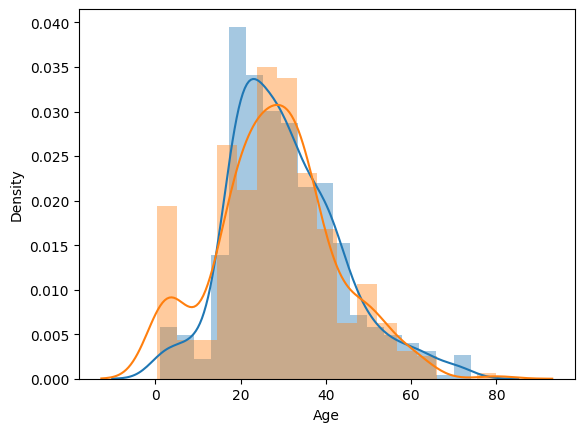

In [48]:
sns.distplot(train_data["Age"][train_data["Survived"] == 0])
sns.distplot(train_data["Age"][train_data["Survived"] == 1])

From the above graph we can see childern and aged personed was saved


C:\Users\dbhuva26\AppData\Local\Temp\ipykernel_16408\3061069197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["Fare"][train_data["Survived"] == 0])
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbhuva26\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. C

<Axes: xlabel='Fare', ylabel='Density'>

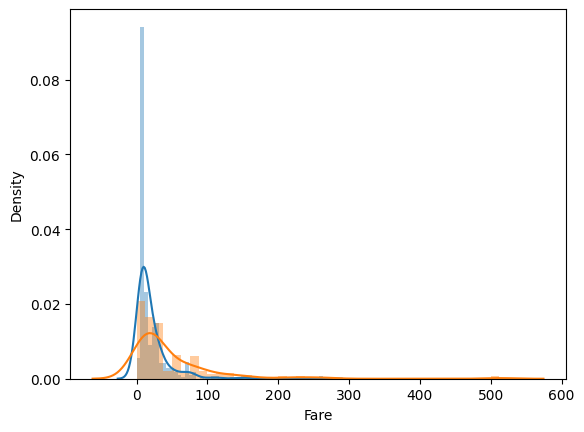

In [49]:
sns.distplot(train_data["Fare"][train_data["Survived"] == 0])
sns.distplot(train_data["Fare"][train_data["Survived"] == 1])

In [51]:
train_data.drop(["Ticket"], axis=1, inplace=True)
test_data.drop(["Ticket"], axis=1, inplace=True)

Joining Sibling/Spouse and Parch clm as they represent total number of family members


In [52]:
train_data["Family_member"] = train_data["SibSp"] + train_data["Parch"] + 1

In [55]:
test_data["Family_member"] = test_data["SibSp"] + test_data["Parch"] + 1

In [53]:
train_data["Family_member"].value_counts()

Family_member
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [54]:
train_data.groupby(['Family_member'])["Survived"].mean()

Family_member
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [56]:
def cal_family_size(number):
    if number == 1:
        return "Alone"
    elif number > 1 and number < 5:
        return "Medium"
    else:
        return "Large"

In [57]:
train_data["Family_size"] = train_data["Family_member"].apply(cal_family_size)
test_data["Family_size"] = test_data["Family_member"].apply(cal_family_size)

In [58]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_member,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [61]:
passengerId = test_data["PassengerId"].values

In [59]:
train_data.drop(columns=["SibSp", "Parch", "Family_member",
                "Name", "PassangerId"], inplace=True)
test_data.drop(columns=["SibSp", "Parch", "Family_member",
               "Name", "PassangerId"], inplace=True)

In [64]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone


In Pclass, there are values like order, so algo might categorize it according to it's priority. and same for Embarked


In [66]:
# Drop 1st clm of each to avoid multi co-linearity problem. Otherwise algo finds kind of matematical relations among it
train_data = pd.get_dummies(train_data, columns=[
    "Pclass", "Embarked", "Sex", "Family_size"], drop_first=True)

In [69]:
test_data = pd.get_dummies(test_data, columns=[
    "Pclass", "Embarked", "Sex", "Family_size"], drop_first=True)

In [67]:
train_data.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,Family_size_Large,Family_size_Medium
0,0,22.0,7.2500,False,True,False,True,True,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,True,False,False,False
3,1,35.0,53.1000,False,False,False,True,False,False,True
4,0,35.0,8.0500,False,True,False,True,True,False,False


In [70]:
test_data.head()

,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,Family_size_Large,Family_size_Medium
0,34.5,7.8292,False,True,True,False,True,False,False
1,47.0,7.0000,False,True,False,True,False,False,True
2,62.0,9.6875,True,False,True,False,True,False,False
3,27.0,8.6625,False,True,False,True,True,False,False
4,22.0,12.2875,False,True,False,True,False,False,True


In [71]:
X = train_data.iloc[:, 1:].values
y = train_data.iloc[:, 0].values

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

In [73]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)

y_pred = dc.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7877094972067039

In [75]:
X_test_final = test_data.iloc[:, :].values

In [77]:
y_test_final = dc.predict(X_test_final)

In [78]:
final = pd.DataFrame()

In [79]:
final["passengerId"] = passengerId
final["survived"] = y_test_final

In [80]:
final

,passengerId,survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [82]:
final.to_csv("Kaggle_submision.csv", index=False)